<a href="https://colab.research.google.com/github/anirudhssundar/optimal_control/blob/main/6553_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [2]:
def get_p(x1,x2,r,dt):
  # p = [x[-1]]

  if type(r)!=int:
    p1 = [0]
    p2 = [0]
    x1_rev = x1[::-1]
    x2_rev = x2[::-1]
    r_rev = r[::-1]
    for i in range(1,len(x1)):
      # p_t_minus_dt = p[-1]*(1-dt) + 2*x_rev[i]*dt
      p2_t_minus_dt = p2[-1] - dt*(p2[-1]/(2*np.sqrt(x2_rev[i])) - 4*(x2_rev[i]-r_rev[i]))
      p2.append(p2_t_minus_dt)

      p1_t_minus_dt = p1[-1] - dt*(p1[-1]/(2*np.sqrt(x1_rev[i])) - p2[-1]/(2*np.sqrt(x1_rev[i])))
      p1.append(p1_t_minus_dt)
    return np.array(p1[::-1]), np.array(p2[::-1])
  
  else:
    p1 = [0]
    p2 = [0]
    x1_rev = x1[::-1]
    x2_rev = x2[::-1]
    for i in range(1,len(x1)):
      # p_t_minus_dt = p[-1]*(1-dt) + 2*x_rev[i]*dt
      p2_t_minus_dt = p2[-1] - dt*(p2[-1]/(2*np.sqrt(x2_rev[i])) - 4*(x2_rev[i]-r))
      p2.append(p2_t_minus_dt)

      p1_t_minus_dt = p1[-1] - dt*(p1[-1]/(2*np.sqrt(x1_rev[i])) - p2[-1]/(2*np.sqrt(x1_rev[i])))
      p1.append(p1_t_minus_dt)
    return np.array(p1[::-1]), np.array(p2[::-1])

In [3]:
def get_u(t1,t2,t3,dt):
  t = np.arange(1000)
  dynu = []
  for i,foo in enumerate(t):
    if foo*dt < t1:
      dynu.append(2)
    elif (foo*dt>=t1) and (foo*dt<t2):
      dynu.append(1)
    elif (foo*dt>=t2) and(foo*dt<t3):
      dynu.append(2)
    else:
      dynu.append(1)
  return dynu

In [4]:
def get_single_u(t1,dt):
  t = np.arange(1000)
  dynu = []
  for i,foo in enumerate(t):
    if foo*dt < t1:
      dynu.append(2)
    else:
      dynu.append(1)
  return np.array(dynu)

In [5]:
def get_double_u(t1,t2,dt):
  t = np.arange(1000)
  dynu = []
  for i,foo in enumerate(t):
    if foo*dt < t1:
      dynu.append(2)
    elif (foo*dt >=t1) and (foo*dt<t2):
      dynu.append(1)
    else:
      dynu.append(2)
  return np.array(dynu)

In [6]:
def J(x,r,dt):
  val = 2*np.sum((x - r)**2)*dt
  return val

In [7]:
def J_vec(x,r,dt):
  val = 2*np.sum((x))

In [8]:
def dyn_u(t1,t2,dt):
  dynu = get_u(t1,t2,dt)
  dynx = get_trajectory(dynu,1.5,dt)
  cost = J(dynx,2.5,dt)
  return cost

In [9]:
def get_trajectory_x1(u,x1_0,dt):
  x = x1_0
  x_fin = []
  x_fin.append(x1_0)
  for i in u:
    x_dot = -np.sqrt(x) + i
    x_new = x_dot*dt + x
    x_fin.append(x_new)
    x = x_new 
  return np.array(x_fin[:-1])

In [10]:
def get_trajectory_x2(x1,x2_0,dt):
  x = x2_0
  x_fin = []
  x_fin.append(x2_0)
  for i in x1:
    x_dot = -np.sqrt(x) + i
    x_new = x_dot*dt + x
    x_fin.append(x_new)
    x = x_new 
  return np.array(x_fin[:-1])

In [11]:
def minimize_hamiltonian(p1,p2,x1,x2,dt):
  conv_u = np.arange(1,2,0.01)
  # minimize p1f1 + p2f2 +L -> same as minimizing p1f1 since u doesnt appear in f2
  v_i = []
  for i in range(len(p1)):
    min_index = np.argmin(p1[i]*(conv_u-np.sqrt(x1[i])))
    v_i.append(conv_u[min_index])
  return np.array(v_i)

hi 4.659197338766558
hi 4.286312127548642
hi 3.8804619837003393
hi 3.4411420285629095
hi 2.96881822601674
hi 2.466400994772345
hi 1.9405495904444399
hi 1.4001464045398584


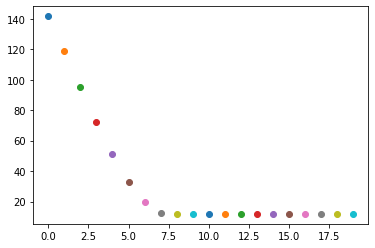

In [12]:
# Part a -> Single switching
x1_0 = 2
x2_0 = 2
dt = 0.01
t = np.arange(1000)
r = 3

u = np.ones(1000)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)


alpha=0.0002
beta=0.5
tol = 1e-4

t_1 = 5
# t_2 = np.arange()
# t_3 = 9

u = np.array(500*[2]+500*[1])
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)
p1,p2 = get_p(x1,x2,r,dt)

# ARMIJO STUFF

# Single Switch
for iters in range(20):
  beta=0.5
  x1 = get_trajectory_x1(u, x1_0,dt)
  x2 = get_trajectory_x2(x1, x2_0, dt)
  
  plt.scatter(iters,J(x2,r,dt))

  for l in range(10):
    t_new = t_1 - (beta**l)*p1[int(t_1/dt)]
    if t_new < 0:
      t_new = t_1
    u_new = get_single_u(t_new,dt)
    x1_temp = get_trajectory_x1(u_new, x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp, x2_0, dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < -alpha*(beta**l)*(p1[int(t_1/dt)]**2):
      t_1 = t_new
      print("hi",t_1)
      u = u_new
      # print(l)
      break
    beta = beta/2
# plt.plot(u)

hi 6.932264103868337
hi 6.862279200764303
hi 6.790048458577772
hi 6.715570665868057
hi 6.638518103016791
hi 6.558878213177931
hi 6.476633260944913


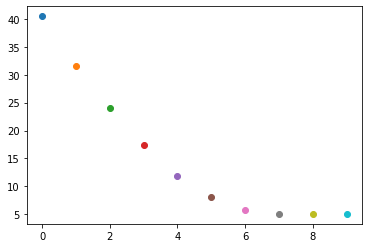

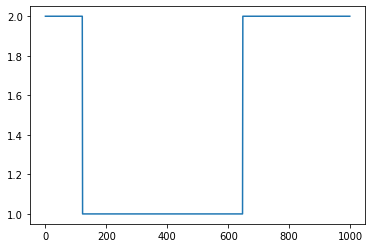

In [13]:
# Part a-> 2 switchings
x1_0 = 2
x2_0 = 2
dt = 0.01
t = np.arange(1000)
r = 3

u = np.ones(1000)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)


alpha=0.0002
beta=0.5
tol = 1e-4

t_1 = 3
t_2 = 7
# t_2 = np.arange()
# t_3 = 9

# u = np.array(500*[2]+500*[1])
u = get_double_u(t_1,t_2,dt)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)
p1,p2 = get_p(x1,x2,r,dt)

# ARMIJO STUFF

# Single Switch
for iters in range(10):
  beta = 0.5
  x1 = get_trajectory_x1(u, x1_0,dt)
  x2 = get_trajectory_x2(x1, x2_0, dt)
  
  plt.scatter(iters,J(x2,r,dt))

  for l in range(20):
    t_new = t_1 - (beta**l)*p1[int(t_1/dt)]
    if t_new < 0:
      t_new = t_1
    u_new = get_double_u(t_new,t_2,dt)
    x1_temp = get_trajectory_x1(u_new, x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp, x2_0, dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < -alpha*(beta**l)*(p1[int(t_1/dt)]**2):
      t_1 = t_new
      # print("hi",t_1)
      u = u_new
      # print(l)
      break
    beta = beta/2

  # Optimize for t_2
  beta=0.5
  for l in range(20):
    if (t_2/dt) > 1000:
      t_2 = 9.99
    t2_new = t_2 - (beta**l)*(+1)*p1[int(t_2/dt)]
    # if t2_new > 1000:
      # t2_new = t_2
    u_new = get_double_u(t_1,t2_new,dt)
    x1_temp = get_trajectory_x1(u_new, x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp, x2_0, dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < -alpha*(beta**l)*(p1[int(t_2/dt)]**2):
      t_2 = t2_new
      print("hi",t_2)
      u = u_new
      # print(l)
      break
    beta = beta/2
plt.figure()
plt.plot(u)

2 5 5.915946123938521
1.3990374681415823 5 5.50645605561812
1.3990374681415823 4.59027328484456 5.492230837808686
1.3816176823721844 4.577895261120069 5.492119444214932
1.3641937663736734 4.565477792018843 5.492008050621179
1.3467620871501174 4.553040656251113 5.491896657027425
1.329323314851919 4.540583890020972 5.4917852634336715
1.3118781281484133 4.528107528689607 5.491673869839918
1.2944299913778046 4.515592079927156 5.491562476246164
1.27697647395802 4.503057137208304 5.491451082652411


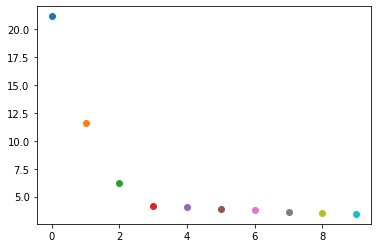

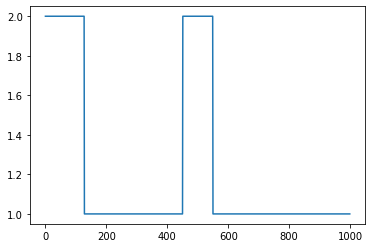

In [ ]:
# Part a-> 3 switchings
x1_0 = 2
x2_0 = 2
dt = 0.01
t = np.arange(1000)
r = 3

u = np.ones(1000)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)


alpha=0.02
beta=0.5
tol = 1e-4

t_1 = 2
t_2 = 5
t_3 = 7

# u = np.array(500*[2]+500*[1])
# u = get_double_u(t_1,t_2,dt)
u = get_u(t_1,t_2,t_3,dt)
# plt.figure()
# plt.plot(u)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)
p1,p2 = get_p(x1,x2,r,dt)

# ARMIJO STUFF


for iters in range(10):
  beta = 0.9
  x1 = get_trajectory_x1(u, x1_0,dt)
  x2 = get_trajectory_x2(x1, x2_0, dt)
  
  plt.scatter(iters,J(x2,r,dt))
  
  # Optimize for t_2
  
  beta2=0.9
  for l in range(20):
    # if (t_2/dt) > 1000:
      # t_2 = 9.99
    t2_new = t_2 - (beta2**l)*(1)*p1[int(t_2/dt)]
    if t2_new > t_3:
      t2_new = t_2
      continue
    u_new = get_u(t_1,t2_new,t_3,dt)
    x1_temp = get_trajectory_x1(u_new, x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp, x2_0, dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < -alpha*(beta2**l)*(p1[int(t_2/dt)]**2):
      t_2 = t2_new
      # print("hi",t_2)
      u = u_new
      # print(l)
      break
    beta2 = beta2/2
  

  beta3=0.25
  for l in range(20):
    # if (t_3/dt) > 1000:
      # t_3 = 9.99
    t3_new = t_3 - (beta3**l)*(1)*p1[int(t_3/dt)]
    # print("bro",t3_new,(beta**l)*(1)*p1[int(t_3/dt)])
    if t3_new < t_2:
      t3_new = t_3
      continue
    # if t2_new > 1000:
      # t2_new = t_2
    u_new = get_u(t_1,t_2,t3_new,dt)
    x1_temp = get_trajectory_x1(u_new, x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp, x2_0, dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < -alpha*(beta3**l)*(p1[int(t_3/dt)]**2):
      t_3 = t3_new
      # print("hi",t_3)
      u = u_new
      # print(l)
      break
    beta3 = beta3/2
  

  # Optimize for t_1
  for l in range(20):
    t_new = t_1 - (beta**l)*p1[int(t_1/dt)]
    if t_new < 0:
      t_new = t_1
    u_new = get_u(t_new,t_2,t_3,dt)
    x1_temp = get_trajectory_x1(u_new, x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp, x2_0, dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < -alpha*(beta**l)*(p1[int(t_1/dt)]**2):
      t_1 = t_new
      # print("hi",t_1)
      u = u_new
      # print(l)
      break
    beta = beta/2
  


  print(t_1,t_2,t_3)
plt.figure()
plt.plot(u)

1.233929813511795 4.871508881985091 5.353698045283864
1.2309233456398574 4.739872242445457 5.225918355739847
1.2279168768574908 4.604991622731544 5.102324505746353
1.2249101752328062 4.467198600216644 4.9702157312711055
1.2219034736081216 4.326355823414085 4.840325785537585
1.2188967711949754 4.182525222694023 4.710039565864218
1.024199858195439 4.0357455730399225 4.6655720895904755
1.0211952755943725 3.8858389232762844 4.520012338080903
0.8266622561221727 3.732822538532728 4.508572668710656
0.8236735721954489 3.576702502294226 4.359097492967818
0.8206848882687251 3.4172822948528006 4.215174292843685
0.8206732478332949 3.254571579707015 4.070575699444067
0.627182656303419 3.0885882476074995 4.058355231206086
0.6242247479013443 2.919162879911492 3.9010755847291985
0.6212668394992696 2.7463513612136143 3.8509495670465768
0.6183089386791206 2.570244969637558 3.8004841277871204
0.6153529769378486 2.5674769431836952 3.800298294028574
0.6153529769378486 2.5674769431836952 3.800298294028574
0

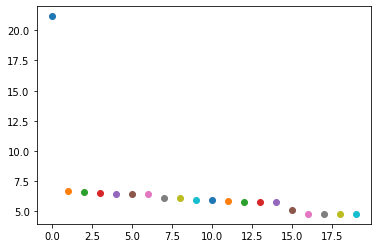

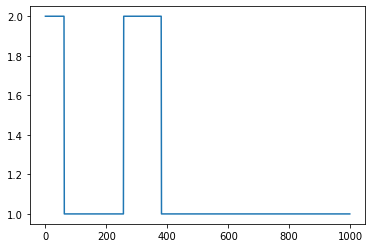

In [ ]:
# Part a-> 3 switchings
x1_0 = 2
x2_0 = 2
dt = 0.01
t = np.arange(1000)
r = 3

u = np.ones(1000)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)


alpha=0.02
beta=0.5
tol = 1e-4

t_1 = 2
t_2 = 5
t_3 = 7

# u = np.array(500*[2]+500*[1])
# u = get_double_u(t_1,t_2,dt)
u = get_u(t_1,t_2,t_3,dt)
# plt.figure()
# plt.plot(u)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)
p1,p2 = get_p(x1,x2,r,dt)

# ARMIJO STUFF


for iters in range(20):
  beta = 0.5
  x1 = get_trajectory_x1(u, x1_0,dt)
  x2 = get_trajectory_x2(x1, x2_0, dt)
  
  plt.scatter(iters,J(x2,r,dt))
  
  # Optimize for t_2
  
  beta2=0.5
  for l in range(10):
    # if (t_2/dt) > 1000:
      # t_2 = 9.99
    t2_new = t_2 - (beta2**l)*(1)*p1[int(t_2/dt)]
    if t2_new > t_3:
      t2_new = t_2
      continue
    u_new = get_u(t_1,t2_new,t_3,dt)
    x1_temp = get_trajectory_x1(u_new, x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp, x2_0, dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < -alpha*(beta2**l)*(p1[int(t_2/dt)]**2):
      t_2 = t2_new
      # print("hi",t_2)
      u = u_new
      # print(l)
      # break
      # continue
    beta2 = beta2/2
  

    beta3=0.25
    # if (t_3/dt) > 1000:
      # t_3 = 9.99
    t3_new = t_3 - (beta3**l)*(1)*p1[int(t_3/dt)]
    # print("bro",t3_new,(beta**l)*(1)*p1[int(t_3/dt)])
    if t3_new < t_2:
      t3_new = t_3
      continue
    # if t2_new > 1000:
      # t2_new = t_2
    u_new = get_u(t_1,t_2,t3_new,dt)
    x1_temp = get_trajectory_x1(u_new, x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp, x2_0, dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < -alpha*(beta3**l)*(p1[int(t_3/dt)]**2):
      t_3 = t3_new
      # print("hi",t_3)
      u = u_new
      # print(l)
      # break
      # continue
    beta3 = beta3/2
  
    t_new = t_1 - (beta**l)*p1[int(t_1/dt)]
    if t_new < 0:
      t_new = t_1
    u_new = get_u(t_new,t_2,t_3,dt)
    x1_temp = get_trajectory_x1(u_new, x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp, x2_0, dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < -alpha*(beta**l)*(p1[int(t_1/dt)]**2):
      t_1 = t_new
      # print("hi",t_1)
      u = u_new
      # print(l)
      # break
      # continue
    beta = beta/2
  


print(t_1,t_2,t_3)
plt.figure()
plt.plot(u)

1.3956207548582076 5.410399911657573 6.7800335554915065
1.2765613143671322 5.431287083558176 6.766347607509386
1.223510563999756 5.413153741536544 6.776795038002619
0.9724829118592275 5.205380773518538 6.85980466270463
1.0011726259746871 5.203414017277833 6.8422753577151765
1.1156562415765476 5.2187498159732035 6.671785414431008
1.0125366760230277 5.107197375836449 6.672315023552125
1.0687023885314137 5.08684145260123 6.570373682242552
1.012985163070141 5.017780050773552 6.547105594264155
1.0349424232401612 4.983490636319202 6.486985496199257
1.0018760642089652 4.9381002504206934 6.457411592219945
1.0223811800074558 4.879958314797576 6.360812476965336
1.0123565956217424 4.87934078711029 6.357840886102286
0.9775008635556117 4.833818313490715 6.354803802005894
0.983374688165205 4.8307649221777975 6.3515223467212225
0.9926859417006849 4.819621566932607 6.311456202164664
0.9895720398643797 4.81831348870379 6.308991645402385
0.9895720398643797 4.81831348870379 6.308991645402385
0.9895720398

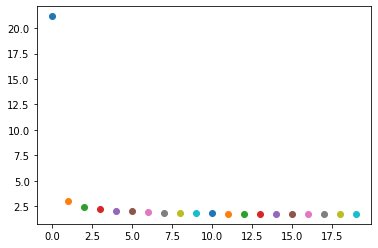

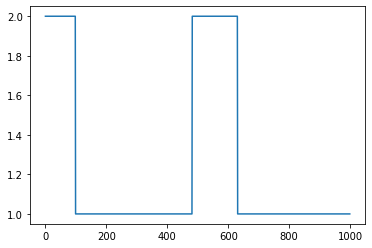

In [36]:
# Part a-> 3 switchings vectorized
x1_0 = 2
x2_0 = 2
dt = 0.01
t = np.arange(1000)
r = 3

u = np.ones(1000)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)


alpha=0.002
beta=0.5
tol = 1e-4

t_1 = 2
t_2 = 5
t_3 = 7

# u = np.array(500*[2]+500*[1])
# u = get_double_u(t_1,t_2,dt)
u = get_u(t_1,t_2,t_3,dt)
# plt.figure()
# plt.plot(u)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)
p1,p2 = get_p(x1,x2,r,dt)

# ARMIJO STUFF

time_vector = np.array([t_1,t_2,t_3])

for iters in range(20):
  beta=0.9
  x1 = get_trajectory_x1(u, x1_0,dt)
  x2 = get_trajectory_x2(x1, x2_0, dt)
  
  plt.scatter(iters,J(x2,r,dt))
  
  for l in range(10):
    t_1,t_2,t_3 = time_vector

    p_vector = np.array([p1[int(t_1/dt)],-p1[int(t_2/dt)],p1[int(t_3/dt)]])
    time_vector_new = time_vector - (beta**l)*(1)*p_vector

    u_new = get_u(time_vector_new[0],time_vector_new[1],time_vector_new[2],dt)
    x1_temp = get_trajectory_x1(u_new, x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp, x2_0, dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < -alpha*(beta**l)*(np.linalg.norm(p_vector)**2):
      time_vector = time_vector_new
      # print("hi",t_2)
      u = u_new
      x1 = x1_temp
      x2 = x2_temp
      p1,p2 = get_p(x1,x2,r,dt)
      # print(l)
      # break
      # continue
    beta = beta/2
  


  print(t_1,t_2,t_3)
plt.figure()
plt.plot(u)

In [37]:
# u = np.array(500*[2]+500*[1])
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)
p1,p2 = get_p(x1,x2,r,dt)

1.743605413335483


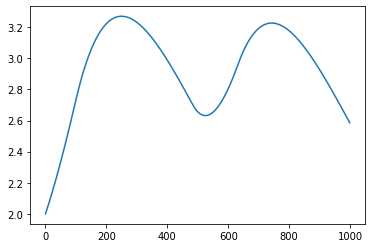

In [38]:
plt.plot(x2)
print(J(x2,r,dt))
# print(t_1,t_2,t_3)
# plt.plot(u)
# plt.plot(t*dt,p1)
# t_new
# p1[int(t_1/dt)]

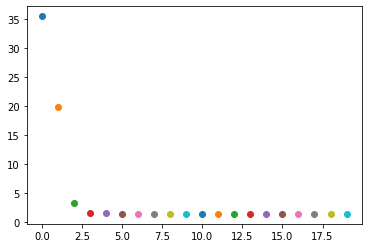

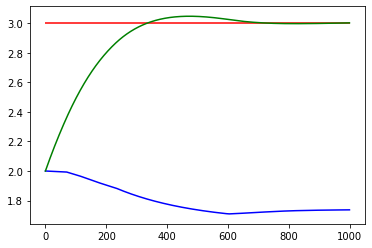

In [ ]:
# Project 1b
x1_0 = 2
x2_0 = 2
dt = 0.01
t = np.arange(1000)
r = 3

u = np.ones(1000)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)
# plt.plot(x1)
# plt.plot(x2)
# p1 = get_p(x1,dt)
# p2 = get_p(x2,dt)
# plt.plot(p1)
# plt.plot(p2)
p1,p2 = get_p(x1,x2,r,dt)
alpha = 1e-4
beta = 0.5
tol = 1e-4

for j in range(20):
  x1 = get_trajectory_x1(u,x1_0,dt)
  x2 = get_trajectory_x2(x1,x2_0,dt)

  plt.scatter(j,J(x2,r,dt))

  p1,p2 = get_p(x1,x2,r,dt)
  v_i = minimize_hamiltonian(p1,p2,x1,x2,dt)

  theta_u = dt*np.sum(np.dot(p1, v_i - u))

  for l in range(10):

    convex_combination = (1 - beta**l)*u + (beta**l)*v_i

    x1_temp = get_trajectory_x1(convex_combination,x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp,x2_0,dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < alpha*(beta**l)*theta_u:
      # print(l)
      u = convex_combination
      # plt.plot(u)
      beta = beta/2
      break
x1_fin = get_trajectory_x1(u, x1_0,dt)
x2_fin = get_trajectory_x2(x1_fin, x2_0,dt)
plt.figure()
plt.plot(t,x1_fin,color='b')
plt.plot(t,x2_fin,color='g')
plt.hlines(y=3.0,xmin=0,xmax=1000,colors='r')

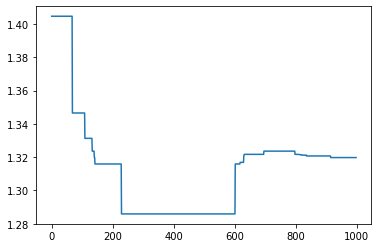

In [ ]:
plt.plot(u[:-1])

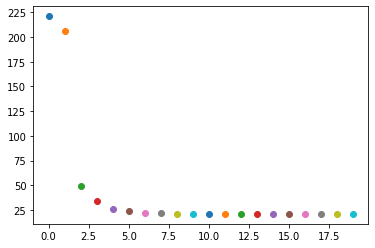

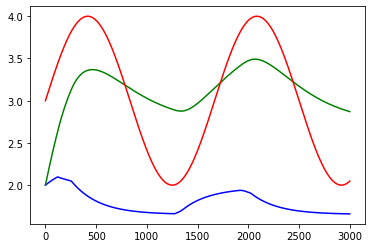

In [ ]:
# Problem 1c
x1_0 = 2
x2_0 = 2
dt = 0.01
t = np.arange(3000)
r = 3 + np.sin(0.12*np.pi*t*dt)

u = np.ones(3000)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)
# plt.plot(x1)
# plt.plot(x2)
# p1 = get_p(x1,dt)
# p2 = get_p(x2,dt)
# plt.plot(p1)
# plt.plot(p2)
p1,p2 = get_p(x1,x2,r,dt)
alpha = 1e-4
beta = 0.5
tol = 1e-4

for j in range(20):
  x1 = get_trajectory_x1(u,x1_0,dt)
  x2 = get_trajectory_x2(x1,x2_0,dt)

  plt.scatter(j,J(x2,r,dt))

  p1,p2 = get_p(x1,x2,r,dt)
  v_i = minimize_hamiltonian(p1,p2,x1,x2,dt)

  theta_u = dt*np.sum(np.dot(p1, v_i - u))

  for l in range(10):

    convex_combination = (1 - beta**l)*u + (beta**l)*v_i

    x1_temp = get_trajectory_x1(convex_combination,x1_0,dt)
    x2_temp = get_trajectory_x2(x1_temp,x2_0,dt)
    if J(x2_temp,r,dt) - J(x2,r,dt) < alpha*(beta**l)*theta_u:
      # print(l)
      u = convex_combination
      # plt.plot(u)
      beta = beta/2
      break
x1_fin = get_trajectory_x1(u, x1_0,dt)
x2_fin = get_trajectory_x2(x1_fin, x2_0,dt)
plt.figure()
plt.plot(t,x1_fin,color='b')
plt.plot(t,x2_fin,color='g')
# plt.hlines(y=3.0,xmin=0,xmax=1000,colors='r')
plt.plot(t,r,color='r')

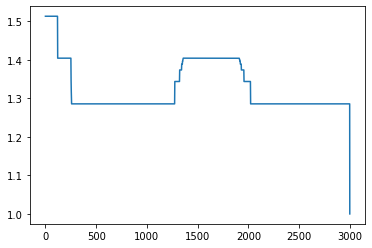

In [ ]:
plt.plot(u)

In [ ]:
x_fin = get_trajectory(u,x_0,dt)

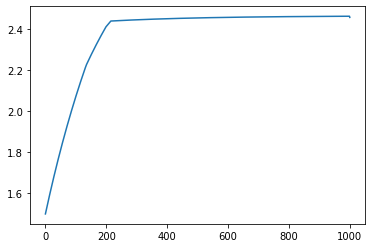

In [ ]:
plt.plot(x_fin)

In [ ]:
beta**l

0.001953125

In [ ]:
J(get_trajectory((1 - beta**l)*u + (beta**l)*u_new,x_0,dt),r,dt) - J(x,r,dt)

0.011193922073761797

In [ ]:
min_set = np.arange(1,2,0.01)
i=0
np.argmin(p[i]*min_set + np.sqrt(x[i]))


99

In [ ]:
p1

array([array([-12.30554748, -16.20931234, -19.56480502, ...,  -2.71033841,
               -5.04628995,  -8.40178263])                                ,
       array([-12.31195319, -16.21468434, -19.56928851, ...,  -2.71928488,
               -5.05461786,  -8.40922203])                                ,
       array([-12.31839856, -16.22009089, -19.57380213, ...,  -2.72828362,
               -5.06299499,  -8.41670622])                                ,
       ...,
       array([-0.00119599, -0.00141613, -0.00160535, ..., -0.00065491,
              -0.00078663, -0.00097585])                              ,
       array([-0.0004    , -0.00047362, -0.00053691, ..., -0.00021903,
              -0.00026309, -0.00032637])                              , 0],
      dtype=object)

In [ ]:
a=1
type(a)

int

In [ ]:
np.sin(0.12*np.pi*30)

-0.9510565162951538

In [ ]:
x1_0 = 2
x2_0 = 2
dt = 0.01
t = np.arange(1000)
r = 3

u = np.ones(1000)
x1 = get_trajectory_x1(u, x1_0,dt)
x2 = get_trajectory_x2(x1, x2_0, dt)

costs = []

for t_1 in range(0,3):
  for t_2 in range(3,6):
    for t_3 in range(6,9):
      u = get_u(t_1,t_2,t_3,dt)
      x1 = get_trajectory_x1(u, x1_0,dt)
      x2 = get_trajectory_x2(x1, x2_0, dt)
      cost = J(x2,r,dt)
      costs.append([t_1,t_2,t_3, cost])

In [ ]:
costs_sorted = sorted(costs,key=lambda x:x[3])

In [ ]:
costs_sorted[0]

[1, 5, 7, 3.025338268825434]

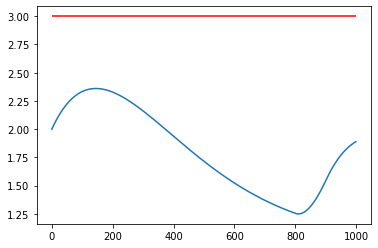

In [ ]:
plt.plot(x2)
plt.hlines(3,0,1000,'r')

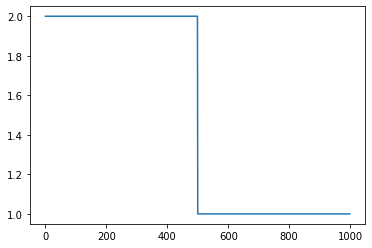

In [ ]:
plt.plot(get_single_u(5,dt))

[1.61, 11.45488438473011]


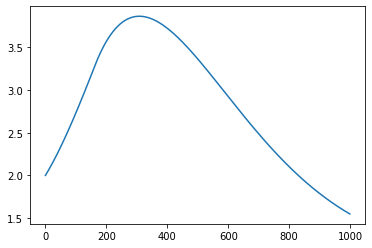

In [ ]:
costs = []
for t_1 in np.arange(0,10,0.01):
  u = get_single_u(t_1,dt)
  x1 = get_trajectory_x1(u,x1_0,dt)
  x2 = get_trajectory_x2(x1,x2_0,dt)
  cost = J(x2,r,dt)
  costs.append([t_1,cost])
print(sorted(costs, key=lambda x:x[1])[0])
t_min = sorted(costs, key=lambda x:x[1])[0][0]
u = get_single_u(t_min,dt)
x1 = get_trajectory_x1(u,x1_0,dt)
x2 = get_trajectory_x2(x1,x2_0,dt)
plt.plot(x2)

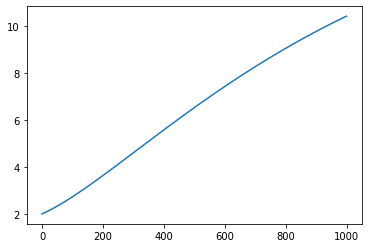

In [ ]:
plt.plot(x2)

[[0.0, 35.51758855027392],
 [0.1, 32.89754745802376],
 [0.2, 30.38768756272799],
 [0.30000000000000004, 27.76507570900027],
 [0.4, 25.73504544286945],
 [0.5, 23.60984021322214],
 [0.6000000000000001, 21.440284529774495],
 [0.7000000000000001, 19.803506032904668],
 [0.8, 18.13826109136968],
 [0.9, 16.641735563638836],
 [1.0, 15.321136252440857],
 [1.1, 14.183364947449693],
 [1.2000000000000002, 13.150837800597529],
 [1.3, 12.482343397295182],
 [1.4000000000000001, 11.931301127700909],
 [1.5, 11.587483892506553],
 [1.6, 11.456141175965392],
 [1.7000000000000002, 11.56289497090821],
 [1.8, 11.85005766494948],
 [1.9000000000000001, 12.38395970757526],
 [2.0, 13.147596354101402],
 [2.1, 14.14428438868963],
 [2.2, 15.376914458961275],
 [2.3000000000000003, 16.847937299519664],
 [2.4000000000000004, 18.743775660373],
 [2.5, 20.51268204806737],
 [2.6, 22.708982457379612],
 [2.7, 25.148806134440264],
 [2.8000000000000003, 27.832201582652132],
 [2.9000000000000004, 31.06468537775747],
 [3.0, 33.

In [ ]:
t_2

94.2121041469433

In [ ]:
t_2*dt

0.9421210414694331

100%|██████████| 100/100 [00:47<00:00,  2.10it/s]

[1.3, 6.710000000000004, 4.903470485910912]


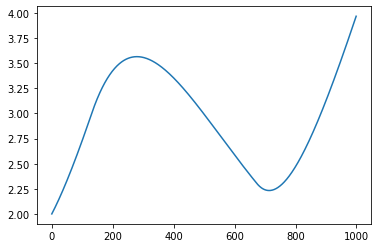

In [ ]:
costs = []
for t_1 in tqdm.tqdm(np.arange(0,9.99,0.1)):
  for t_2 in np.arange(t_1+0.01, 10,0.1):
    u = get_double_u(t_1,t_2,dt)
    x1 = get_trajectory_x1(u,x1_0,dt)
    x2 = get_trajectory_x2(x1,x2_0,dt)
    cost = J(x2,r,dt)
    costs.append([t_1,t_2,cost])
print(sorted(costs, key=lambda x:x[2])[0])
t1_min = sorted(costs, key=lambda x:x[2])[0][0]
t2_min = sorted(costs, key=lambda x:x[2])[0][1]
u = get_double_u(t1_min,t2_min,dt)
x1 = get_trajectory_x1(u,x1_0,dt)
x2 = get_trajectory_x2(x1,x2_0,dt)
plt.plot(x2)

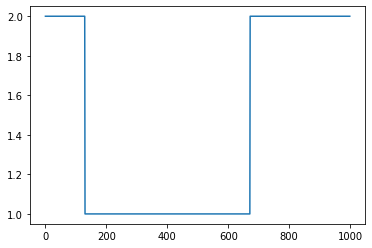

In [ ]:
plt.plot(u)

In [ ]:
# Best for 3 switching case:
t1 = 1
t2 = 4.7
t3 = 6.2
cost = 1.74